In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# RK45-Methode
A = np.array([
    [     0,           0,          0,         0,        0,        0,   0],
    [    1/5,          0,          0,         0,        0,        0,   0],
    [    3/40,        9/40,        0,         0,        0,        0,   0],
    [   44/45,      -56/15,      32/9,        0,        0,        0,   0],
    [19372/6561, -25360/2187, 64448/6561, -212/729,     0,        0,   0],
    [ 9017/3168,   -355/33,   46732/5247,  49/176, -5103/18656,   0,   0],
    [   35/384,        0,       500/1113, 125/192, -2187/6784,  11/84, 0]
])
b_tilde = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0])
b = np.array([5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40])
c = np.array([0, 1/5, 3/10, 4/5, 8/9, 1, 1])

initialwert = np.array([2, 1])

In [113]:
def f(t: float, u: np.ndarray) -> np.ndarray:
    r = np.ndarray(2)
    r[0] = u[0] * (1 - u[1])
    r[1] = u[1] * (u[0] - 1)
    return r

In [114]:
def runge_kutta(f: callable, t: float, y: np.ndarray, h: float, A: np.array, b: np.array, c: np.array) -> np.ndarray:
    s = A.shape[0]

    k = np.zeros((s,len(initialwert)))

    for i in range (0, s):
        k[i] = f(t + c[i] * h, y + h * A[i, :] @ k[:])

    y = y + h * b[:] @ k[:]

    return y

In [115]:
def dormand_prince(f: callable, t0, T, u0, TOL):
    y = np.array([u0])
    t = np.array([t0])
    h0 = (T-t0)/10

    while t0 < T:
        y_test = runge_kutta(f, t0, u0, h0, A, b, c)
        y_tilda = runge_kutta(f, t0, u0, h0, A, b_tilde, c)
        error = np.linalg.norm(y_test - y_tilda)

        H = h0 * (TOL / error)**(1/5)

        if error > TOL:
            h0 = H
            continue

        h0 = min(H, T-t0)
        t0 += h0
        u0 = y_test
        y = np.append(y, [u0], axis=0)
        t = np.append(t, t0)

    return t, y


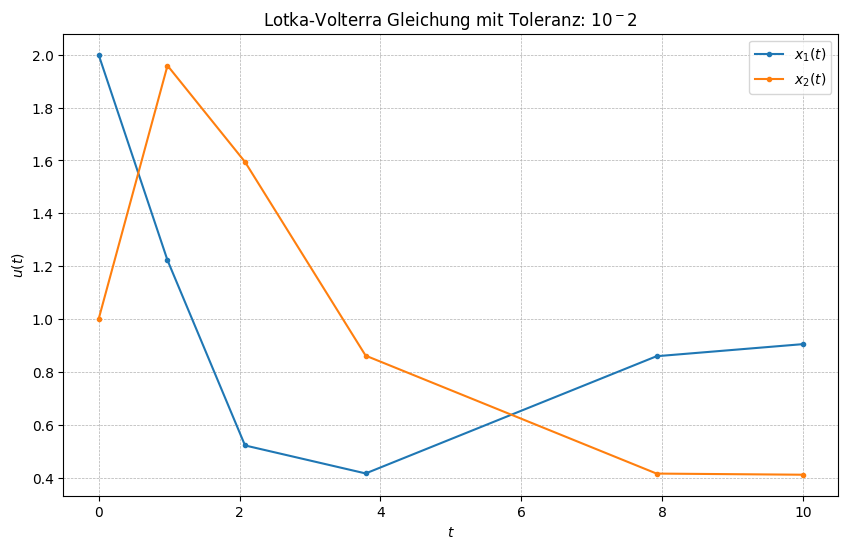

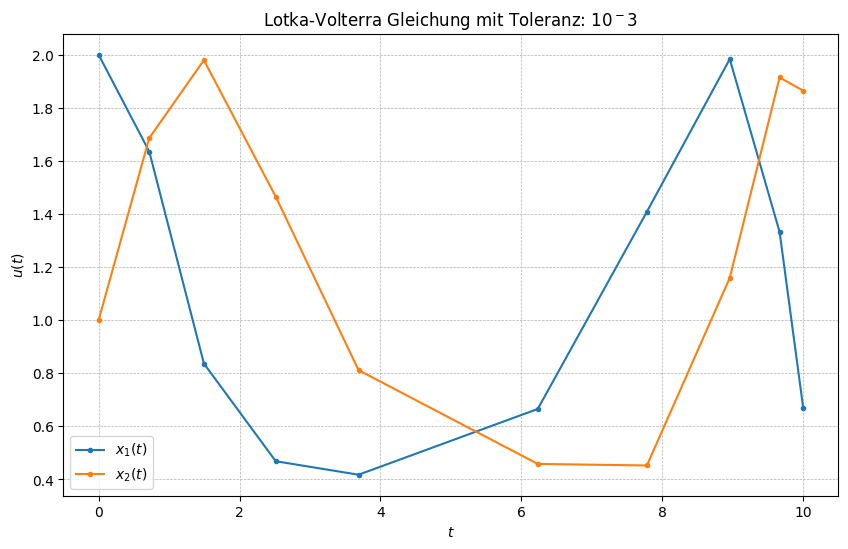

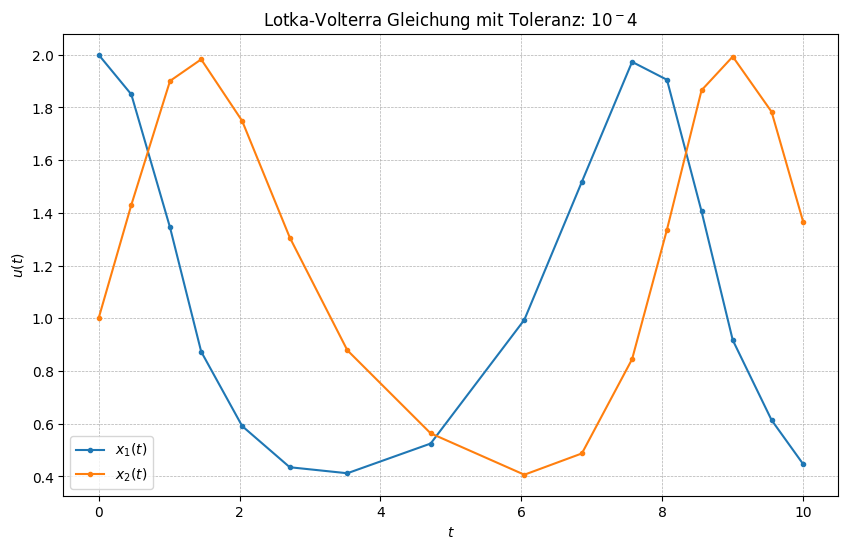

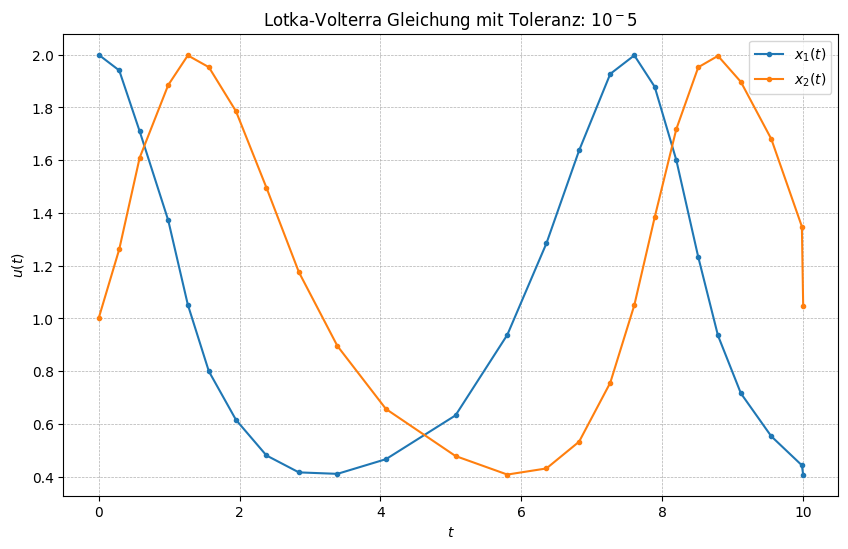

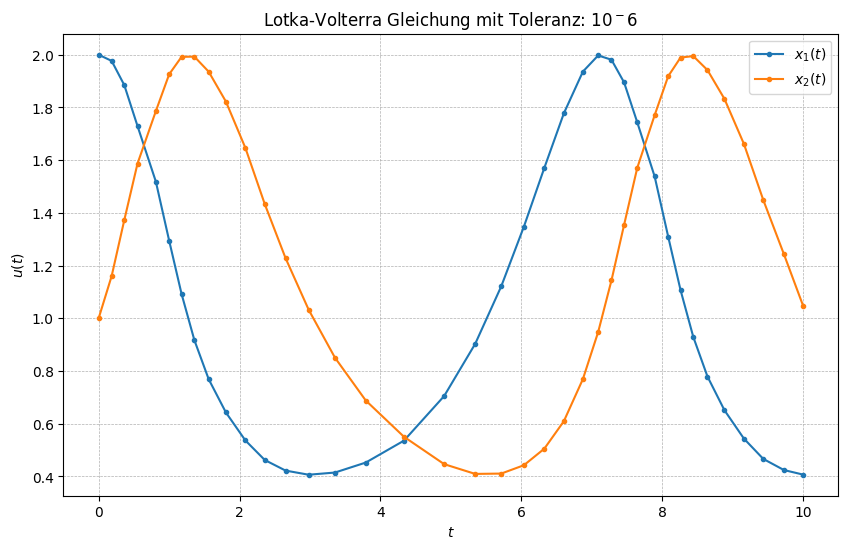

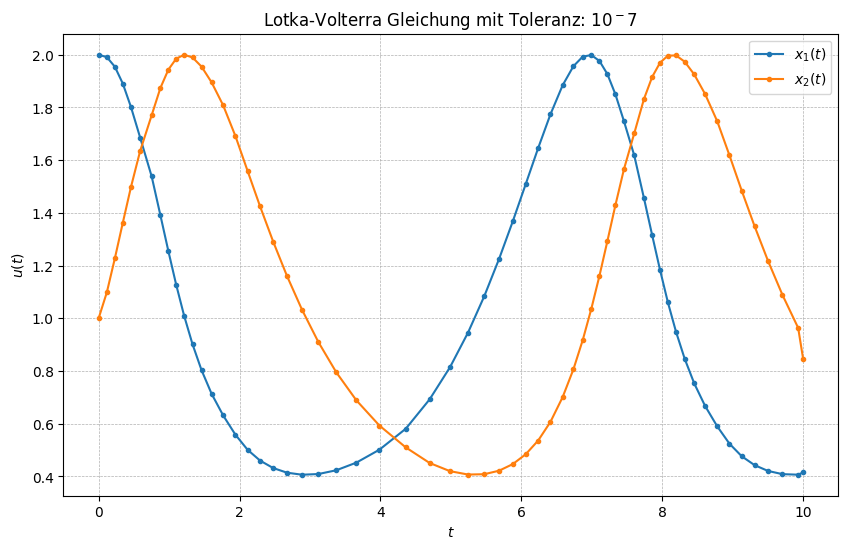

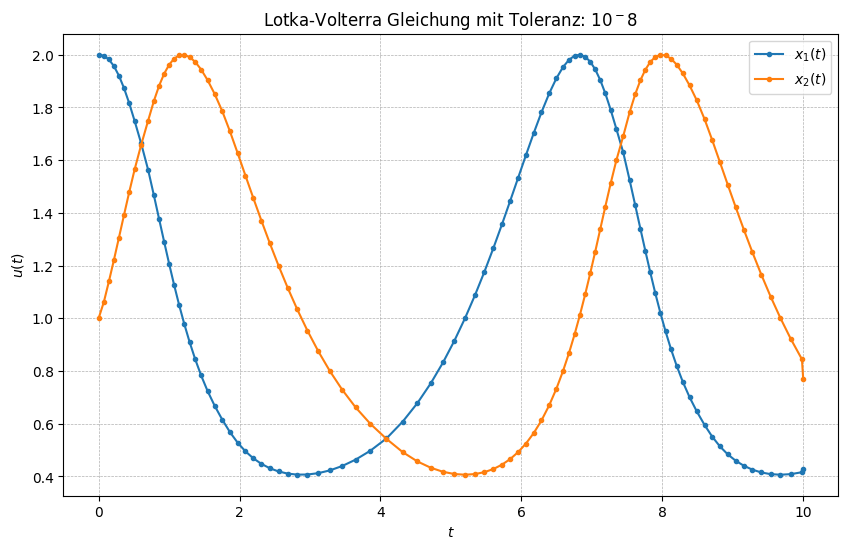

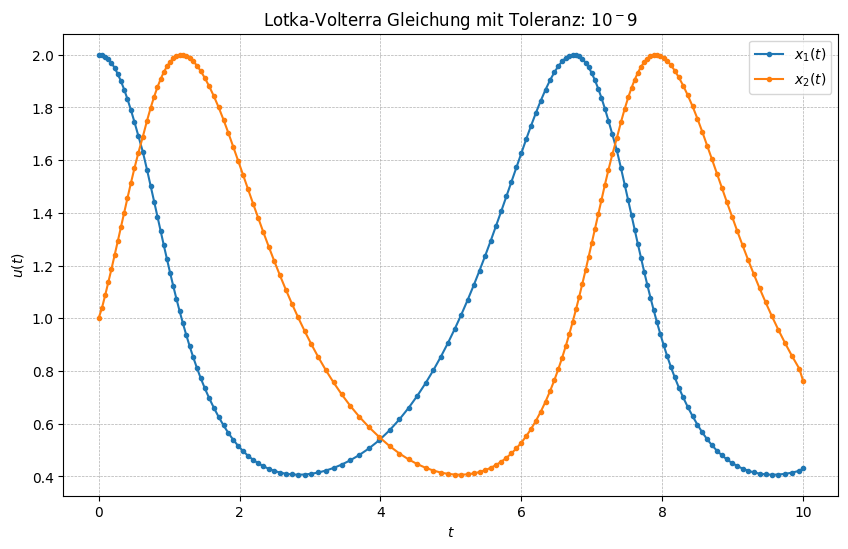

In [116]:
for k in range(2, 10):
    t, u = dormand_prince(f, 0, 10, initialwert, 10**-k)
    print()
    plt.figure(figsize=(10, 6))
    plt.plot(t, u[:,0], marker='.', label='$x_1(t)$')
    plt.plot(t, u[:,1], marker='.', label='$x_2(t)$')
    plt.xlabel("$t$")
    plt.ylabel("$u(t)$")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title(f"Lotka-Volterra Gleichung mit Toleranz: $10^{-k}$")

plt.show()